## Testing one of the good models I have Selected

In [49]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


numeric_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


preprocessor.fit(X_train)


X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

num_features = preprocessor.named_transformers_['num'].get_feature_names_out(numeric_features)
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_features = list(num_features) + list(cat_features)

X_train = pd.DataFrame(X_train, columns=all_features)
X_test = pd.DataFrame(X_test, columns=all_features)

In [50]:
X_train.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.811626,0.314729,0.895791,-1.921155,0.696525,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.152247,3.767643,0.779115,-0.725362,2.475810,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.262144,-0.242193,-0.368191,0.027545,-0.574393,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.262144,0.983035,-2.371116,1.046184,-0.743849,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.287339,0.203344,-1.009905,0.869030,-0.828577,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [51]:
from sklearn.ensemble import ExtraTreesClassifier



clf = ExtraTreesClassifier(random_state=42, max_depth=8, max_features="log2", n_estimators=10)

clf.fit(X_train, y_train)

# Predict on the preprocessed test data
y_pred = clf.predict(X_test)

y_proba = clf.predict_proba(X_test)

Best Threshold=0.570010


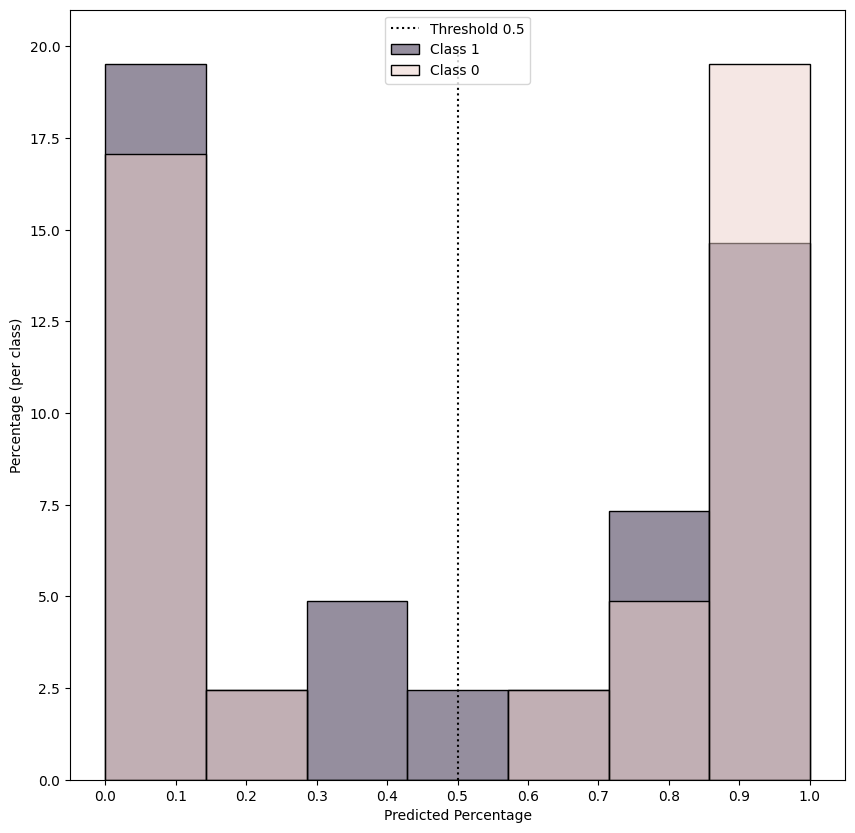

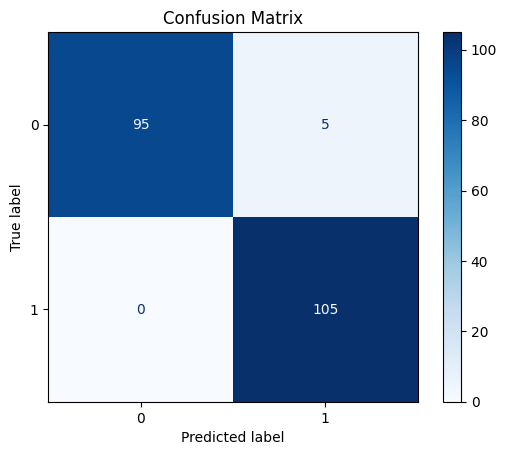

In [52]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve

y_proba = clf.predict_proba(X_test)
results = pd.DataFrame()
results['prob'] = y_proba[:, 1]
results['label'] = y_test
fig, ax = plt.subplots(figsize=(10, 10))
sns.histplot(data=results, x='prob', hue='label', stat='percent')
ax.set_xlabel('Predicted Percentage')
ax.set_ylabel('Percentage (per class)')
plt.vlines(0.5, 0, 20, linestyles ="dotted", colors ="k")
plt.xticks(np.linspace(0, 1, num=11))
ax.legend(['Threshold 0.5', 'Class 1', 'Class 0'])


fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])

J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]

print('Best Threshold=%f' % (best_thresh))

y_df = pd.DataFrame(y_proba[:, 1]).copy()
y_df[y_df[0] < best_thresh] = 0
y_df[y_df[0] >= best_thresh] = 1
y_pred_novo = y_df[0].values
y_pred_novo

conf_matrix = confusion_matrix(y_test, y_pred_novo)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [53]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

precision = precision_score(y_test, y_pred_novo)

recall = recall_score(y_test, y_pred_novo)

accuracy = accuracy_score(y_test, y_pred_novo)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 0.9545454545454546
Recall: 1.0
Accuracy: 0.975609756097561


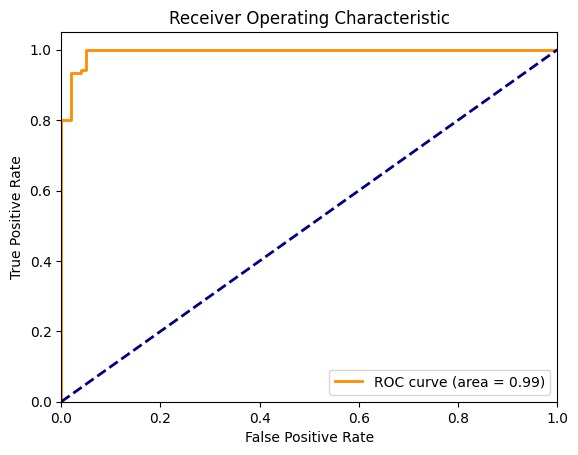

In [54]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
